## Importing libraries

In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as MSE


In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

## Importing dataset

In [ ]:
dataset = pd.read_csv("/content/DESIGN_CREDIT_DATASET2.txt",delim_whitespace=" ")
dataset.drop(columns=['Test','Power'],axis=1)
dataset=dataset.drop(dataset.columns[[3,4]],axis=1)
dataset
dataset.rename(columns = {'Total':'Total Gates', 'Gates':'Test Power'}, inplace = True)

In [ ]:
# dropping last row
dataset = dataset.loc[dataset['VECTOR']!='225']

In [ ]:
len(dataset['VECTOR'][0])

50

In [ ]:
dataset

,VECTOR,Total Gates,Test Power
0,0101011111111111111111111111111111111111111111...,447.0,21.0
1,1101010111111111111111111111111111111111111111...,439.0,23.0
2,1111010101111111111111111111111111111111111111...,426.0,23.0
3,1111110101011111111111111111111111111111111111...,534.0,22.0
4,1111111101010111111111111111111111111111111111...,458.0,23.0
...,...,...,...
220,1111110101010101010101010101010101010101111111...,451.0,114.0
221,1111111101010101010101010101010101010101011111...,454.0,114.0
222,1111111111010101010101010101010101010101010111...,452.0,116.0
223,1111111111110101010101010101010101010101010101...,513.0,115.0


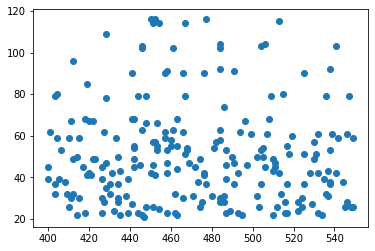

In [ ]:
plt.scatter(dataset['Total Gates'],dataset['Test Power'])
plt.show()

Linear regression

In [ ]:
switches = []
for i in range(len(dataset)):
  count=0
  for j in range(len(dataset["VECTOR"][i])-1):
    if (dataset["VECTOR"][i][j] == '1' and dataset["VECTOR"][i][j+1] == '0'):
      count = count+1
    if (dataset["VECTOR"][i][j] == '0' and dataset["VECTOR"][i][j+1] == '1'):
      count = count+1
  switches.append(count)

In [ ]:
# dataset['switches'] = switches
idx = 1
dataset.insert(loc=idx, column='Switch', value=switches)
dataset

,VECTOR,Switch,Total Gates,Test Power
0,0101011111111111111111111111111111111111111111...,5,447.0,21.0
1,1101010111111111111111111111111111111111111111...,6,439.0,23.0
2,1111010101111111111111111111111111111111111111...,6,426.0,23.0
3,1111110101011111111111111111111111111111111111...,6,534.0,22.0
4,1111111101010111111111111111111111111111111111...,6,458.0,23.0
...,...,...,...,...
220,1111110101010101010101010101010101010101111111...,34,451.0,114.0
221,1111111101010101010101010101010101010101011111...,34,454.0,114.0
222,1111111111010101010101010101010101010101010111...,34,452.0,116.0
223,1111111111110101010101010101010101010101010101...,34,513.0,115.0


In [ ]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [ ]:
ss=StandardScaler()
x=ss.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [ ]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(x_train,y_train)
y_pred_log = log_reg.predict(x_test)

In [ ]:
print(MSE(y_pred_log,y_test))

136.58823529411765


Ridge regression

In [ ]:
reg_ridge = Ridge(alpha = 1)
reg_ridge.fit(x_train,y_train)
y_pred_ridge = reg_ridge.predict(x_test)

In [ ]:
print(MSE(y_pred_ridge,y_test))

35.68166636541798


Nearest neighbour regression

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train,y_train)
y_pred_knn = knn_reg.predict(x_test)

In [ ]:
print(MSE(y_pred_knn,y_test))

13.024117647058823


In [ ]:
MSE_list = list()
for i in range(5,15):
  knn_reg = KNeighborsRegressor(n_neighbors=i)
  knn_reg.fit(x_train,y_train)
  y_pred_knn = knn_reg.predict(x_test)
  MSE_list.append(MSE(y_pred_knn,y_test))

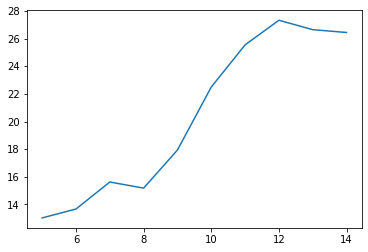

In [ ]:
plt.plot(range(5,15),MSE_list)
plt.show()

In [ ]:
# INCREASING N_NEIGHBOURS DECREASE MSE

Neural network regression

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
ss=StandardScaler()
x=ss.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [ ]:
from sklearn.neural_network import MLPRegressor
reg_nnr = MLPRegressor(random_state=1,max_iter = 2000)
reg_nnr.fit(x_train,y_train)
y_predict_nnr = reg_nnr.predict(x_test)
print('Mean Squared Error(MSE):', MSE(y_predict_nnr,y_test))

Mean Squared Error(MSE): 22.051888138179077


#ANN(Artificial Neural Network Model)

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
2/2 [==============================] - 1s 218ms/step - loss: 12.9268 - mean_squared_logarithmic_error: 12.8695 - val_loss: 5.7840 - val_mean_squared_logarithmic_error: 5.7840
Epoch 2/10
2/2 [==============================] - 0s 30ms/step - loss: 3.5122 - mean_squared_logarithmic_error: 3.4722 - val_loss: 0.4234 - val_mean_squared_logarithmic_error: 0.4234
Epoch 3/10
2/2 [==============================] - 0s 34ms/step - loss: 0.2470 - mean_squared_logarithmic_error: 0.2456 - val_loss: 0.3902 - val_mean_squared_logarithmic_error: 0.3902
Epoch 4/10
2/2 [==============================] - 0s 29ms/step - loss: 0.8171 - mean_squared_logarithmic_error: 0.8225 - val_loss: 1.2056 - val_mean_squared_logarithmic_error: 1.2056
Epoch 5/10
2/2 [==============================] - 0s 31ms/step - loss: 1.5936 - mean_squared_logarithmic_error: 1.5941 - val_loss: 1.5106 - val_mean_squared_logarithmic_error: 1.5106
Epoch 6/10
2/2 [==============================] - 0s 29ms/step - loss: 1.7867 - me

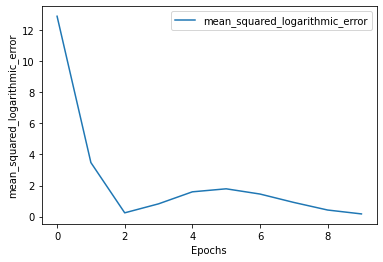

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  #plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
#The image above shows that as the epochs increase the loss decreases, which is a good sign of progress

#with appropriate hyperparameters

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(x_train, y_train)
y_pred_nn=reg.predict(x_test)
print("MSE for Neural Network Model ",MSE(y_pred_nn, y_test))

The Score with  0.8796303817055575


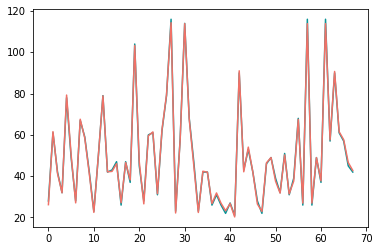

In [ ]:
plt.plot(y_test,color="#0a9396")
plt.plot(y_pred_nn,color="#f07167")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred_lr=logisticRegr.predict(x_test)
print("MSE using logistic regression: ",MSE(y_pred_lr, y_test))

MSE using logistic regression:  136.58823529411765


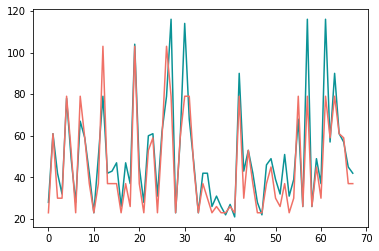

In [ ]:
plt.plot(y_test,color="#0a9396")
plt.plot(y_pred_lr,color="#f07167")
plt.show()